### Imports

In [21]:
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

### Cleaing up data

In [22]:
rulerData = pd.read_csv("ruler.csv")
puckData = pd.read_csv("puck.csv")

# removing unused columns from both dataframes
for col_name in rulerData.columns:
    if col_name not in ["frame_no", "timestamp", "size_px-hotpink", "position_px_x-hotpink", "position_px_y-hotpink", "size_px-lightorange", "position_px_x-lightorange", "position_px_y-lightorange"]:
        del rulerData[col_name]

for col_name in puckData.columns:
    if col_name not in ["frame_no", "timestamp", "size_px-hotpink", "position_px_x-hotpink", "position_px_y-hotpink"]:
        del puckData[col_name]

# drop all empty rows
rulerData.dropna(subset=["size_px-hotpink"], inplace=True)
puckData.dropna(subset=["size_px-hotpink"], inplace=True)

### Ruler stuff

In [23]:
# array of lengths of the ruler for each frame collected
def distance(row):
    return sqrt( (row["position_px_x-hotpink"] - row["position_px_x-lightorange"])**2 + (row["position_px_y-hotpink"] - row["position_px_y-lightorange"])**2 )

rulerData["length"] = rulerData.apply(distance, axis=1)

### Puck stuff

In [24]:
puckData = puckData.drop(puckData.index[:300]) # removes still frames from puck data

#### Populating velocity and acceleration for both x and y components

In [25]:
puckData["xvelocity"] = puckData["position_px_x-hotpink"].diff() / puckData["timestamp"].diff()
puckData["yvelocity"] = puckData["position_px_y-hotpink"].diff() / puckData["timestamp"].diff()
puckData["xaccel"] = puckData["xvelocity"].diff() / puckData["timestamp"].diff()
puckData["yaccel"] = puckData["yvelocity"].diff() / puckData["timestamp"].diff()

#### Plotting position vs time

Text(0.5, 1.0, 'dy vs t')

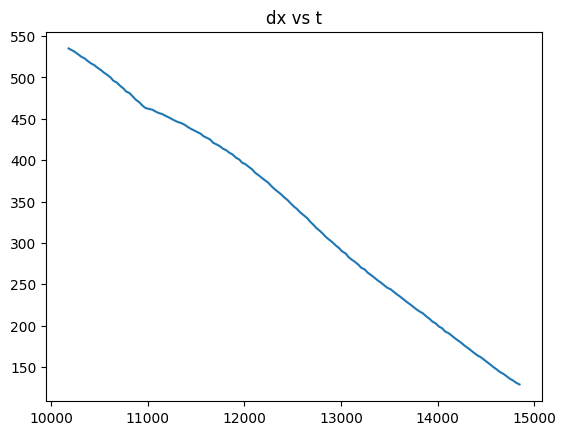

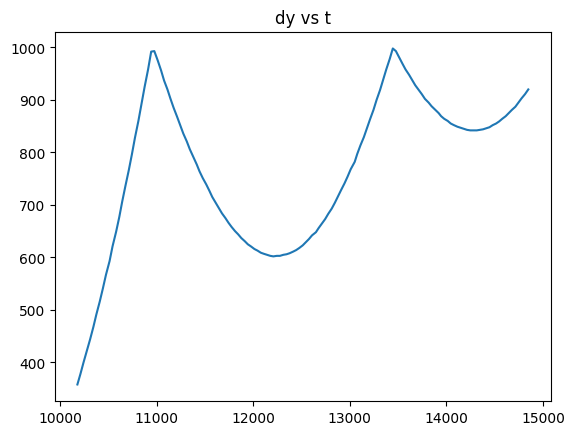

In [26]:
plt.figure()
plt.plot(puckData["timestamp"], puckData["position_px_x-hotpink"])
plt.title("dx vs t")
plt.figure()
plt.plot(puckData["timestamp"], puckData["position_px_y-hotpink"])
plt.title("dy vs t")

#### Plotting velocity vs time

Text(0.5, 1.0, 'vy vs t')

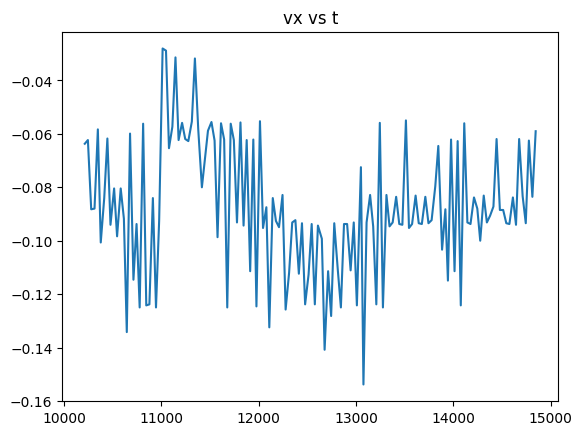

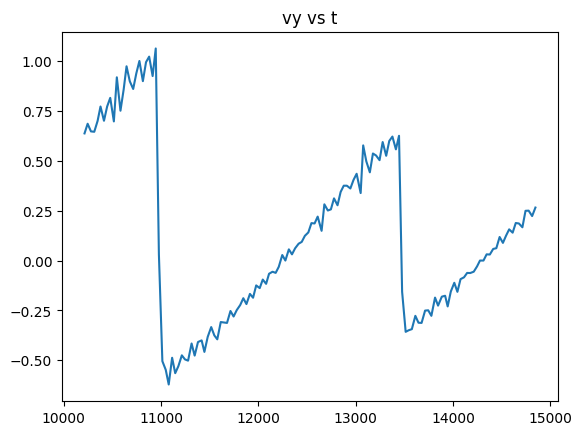

In [27]:
plt.figure()
plt.plot(puckData["timestamp"], puckData["xvelocity"])
plt.title("vx vs t")
plt.figure()
plt.plot(puckData["timestamp"], puckData["yvelocity"])
plt.title("vy vs t")

#### Plotting acceleration vs time

Text(0.5, 1.0, 'ay vs t')

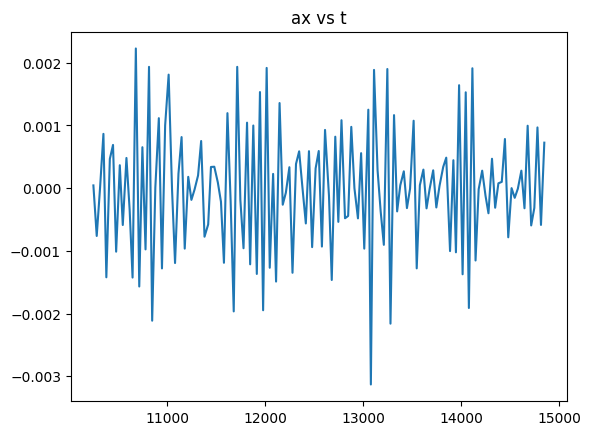

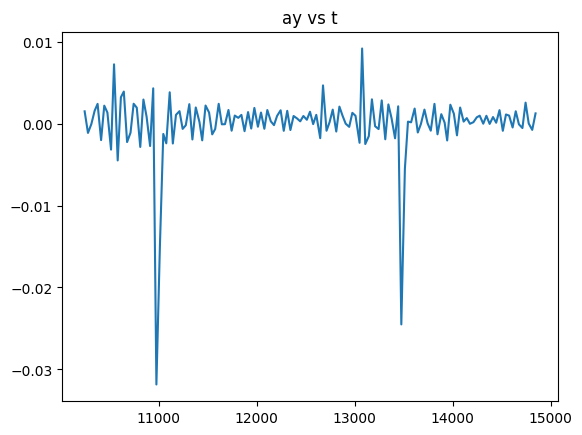

In [28]:
plt.figure()
plt.plot(puckData["timestamp"], puckData["xaccel"])
plt.title("ax vs t")
plt.figure()
plt.plot(puckData["timestamp"], puckData["yaccel"])
plt.title("ay vs t")

In [29]:
plt.show()

In [30]:
### DEBUGGING
print(rulerData.describe())
print(puckData.describe())
#puckData.to_csv("puckDataProcessed.csv", index=False)

         frame_no     timestamp  size_px-hotpink  position_px_x-hotpink  \
count  818.000000    818.000000       818.000000             818.000000   
mean   413.500000  13797.804768         8.068460             372.168704   
std    236.280554   7875.190771         0.252688              73.368445   
min      5.000000    300.300000         8.000000             262.000000   
25%    209.250000   6989.225000         8.000000             333.250000   
50%    413.500000  13797.000000         8.000000             360.000000   
75%    617.750000  20605.225000         8.000000             398.000000   
max    822.000000  27413.400000         9.000000             588.000000   

       position_px_y-hotpink  size_px-lightorange  position_px_x-lightorange  \
count             818.000000           818.000000                 818.000000   
mean              390.622249             7.447433                 741.550122   
std                60.011895             0.497533                  86.081232   
min 